# Arima model

- 
- ARIMA(Autoregressive Integrated Moving Average)
- trend  / seasonality  , residual  decompse 해서 안정적인 시계열 데이터로 예측모델을 자동으로 만들어주시는 분.

- AR(autoregressive) 자기회귀 : 이전 p개의 데이터의 가중합.     동치?, trend, sessonality제거한 - residual 에 해당
- MA(moving Average) 이동평균 : 이전 q개의 예측 오차값   
- I(intergration) 차분누적: 이전 데이터와 d차 차분의 누적의 합 , seasonality부분 해당   

==>> arima는 위3가지 모두 고려   

- arima 모델의 모수   
=>> p : ar모델의 시차    
=>> q : 이동평균 모형의 시차   
=>> d : 차분의 횟수   
=>> p + q < 2, p * q = 0 : p나 q 중 하나는 0, AR이나 MA중 하나의 경향만 띄움   

- arima 모델의 모수 결정
==> q : moving Average 를 구할때 window와 같은 느낌.
==> acf(Autocorrelation FN), PACF(Partial AutoCorrelation FN)을 통해 결정.
1. acf : 시차(lag)에 따른 관측치들 사이의 관련성 측정
2. pacf : 관측지 영향령 배제, 두 시차의 관칙치 간 관련성을 측정하는 함수.



In [32]:
# loibrary import

import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=1)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller


In [7]:
# data import
dataset_filepath = './data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

ts2 = df['Passengers']
ts_log = np.log(ts2)

<class 'pandas.core.frame.DataFrame'>


## PACF ACF

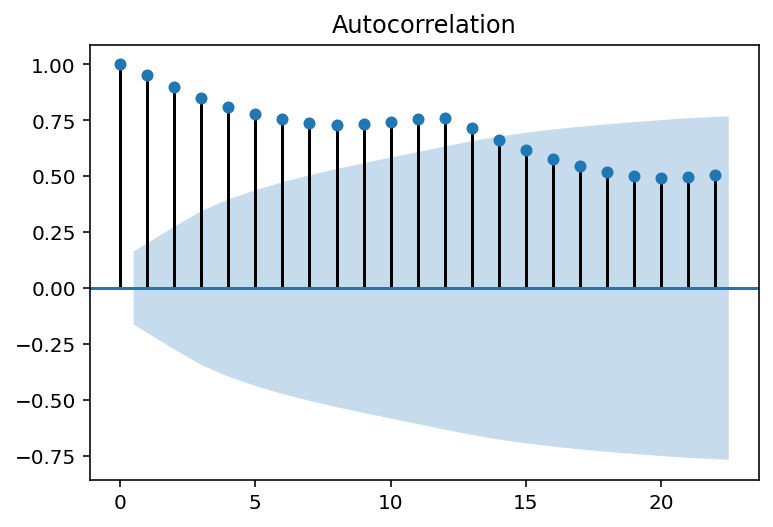

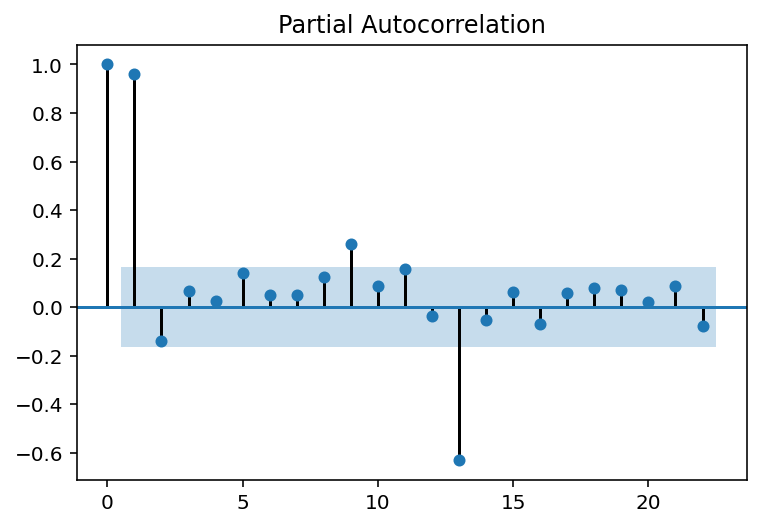

In [6]:


plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

In [8]:
# p = 1, q =0

## d

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


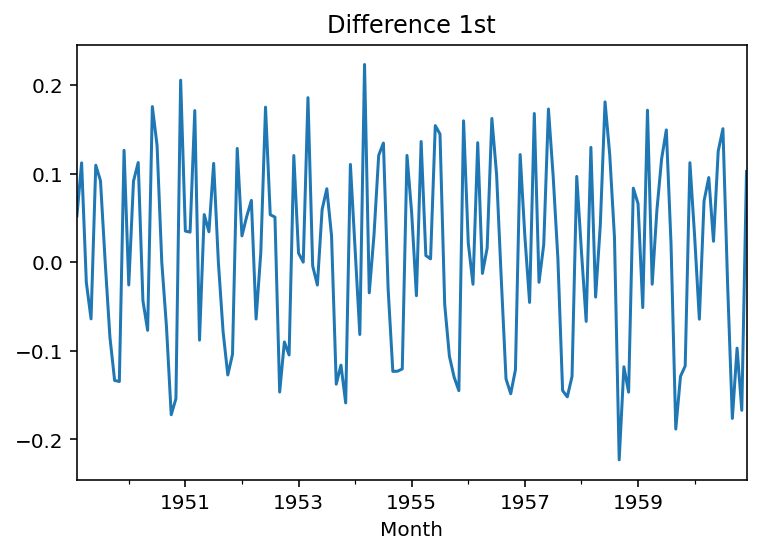

In [11]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Month
1949-03-01    0.059932
1949-04-01   -0.135107
1949-05-01   -0.041032
1949-06-01    0.173506
1949-07-01   -0.017547
                ...   
1960-08-01   -0.176733
1960-09-01   -0.150338
1960-10-01    0.079315
1960-11-01   -0.070168
1960-12-01    0.269530
Name: Passengers, Length: 142, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


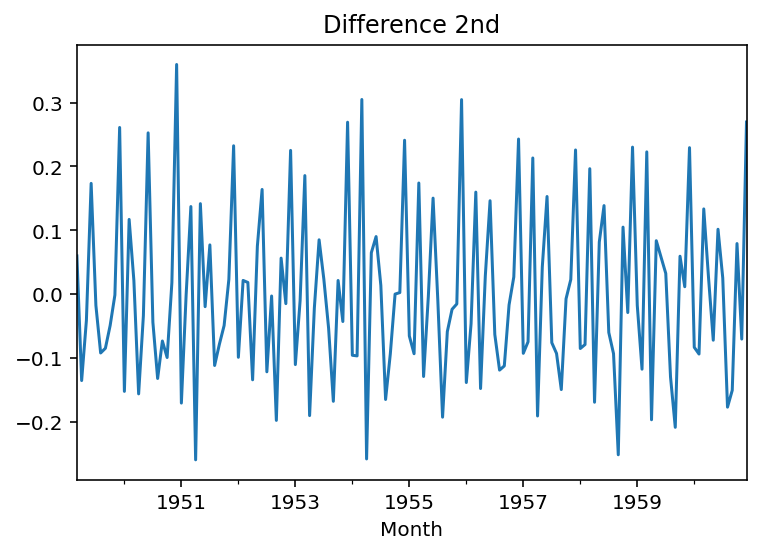

In [35]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
print(diff_2)
diff_2.plot(title='Difference 2nd')


augmented_dickey_fuller_test(diff_2)

# d=2 or 1부터

## train -test data spilt

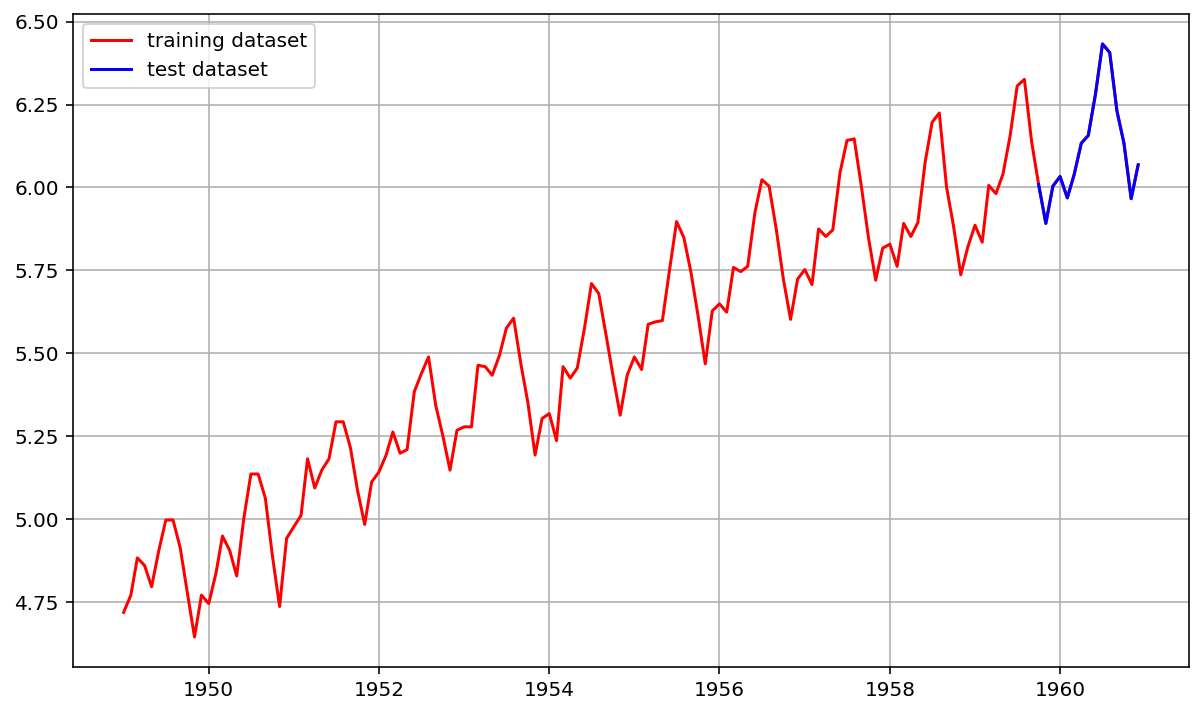

In [13]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [15]:
# data set check
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


## Arima Model 

In [27]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(0, 1, 8))   # p d q
fitted_m = model.fit(disp=-1)  #disp info print 여부.
print(fitted_m.summary())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(0, 1, 8)   Log Likelihood                 143.342
Method:                       css-mle   S.D. of innovations              0.075
Date:                Thu, 13 Aug 2020   AIC                           -266.685
Time:                        12:00:39   BIC                           -238.164
Sample:                    02-01-1949   HQIC                          -255.097
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0100      0.003      3.393      0.001       0.004       0.016
ma.L1.D.Passengers    -0.1045      0.088     -1.182      0.237      -0.278       0.069
ma.L2.D.Passengers  

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


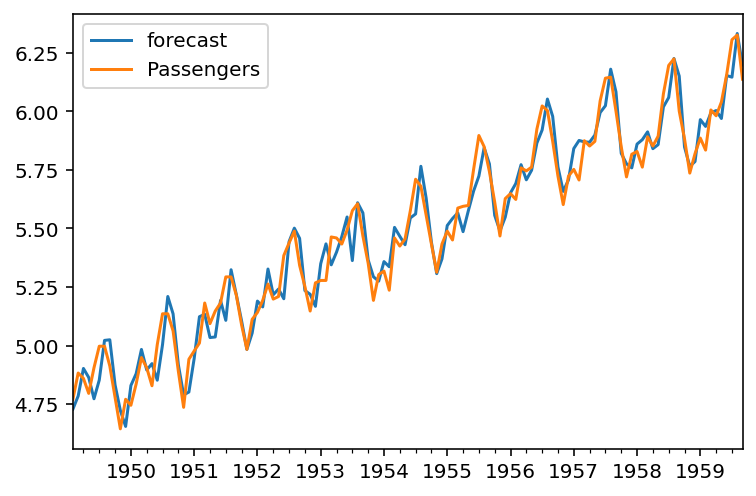

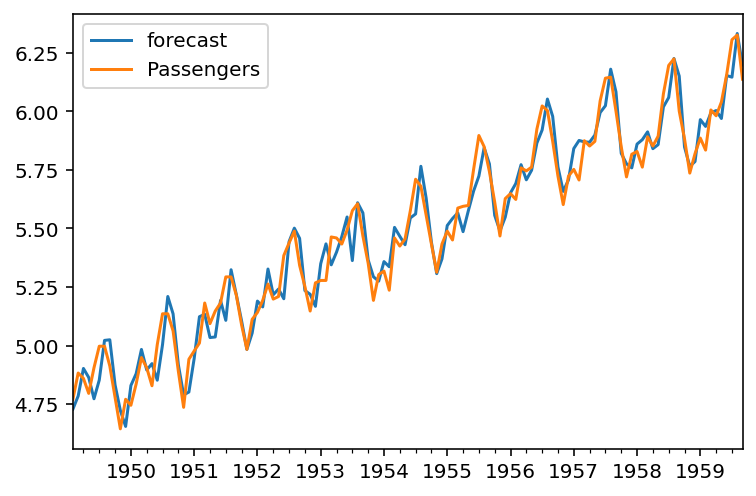

In [28]:
fitted_m.plot_predict()

In [29]:
test_data

Month
1959-10-01    6.008813
1959-11-01    5.891644
1959-12-01    6.003887
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, dtype: float64

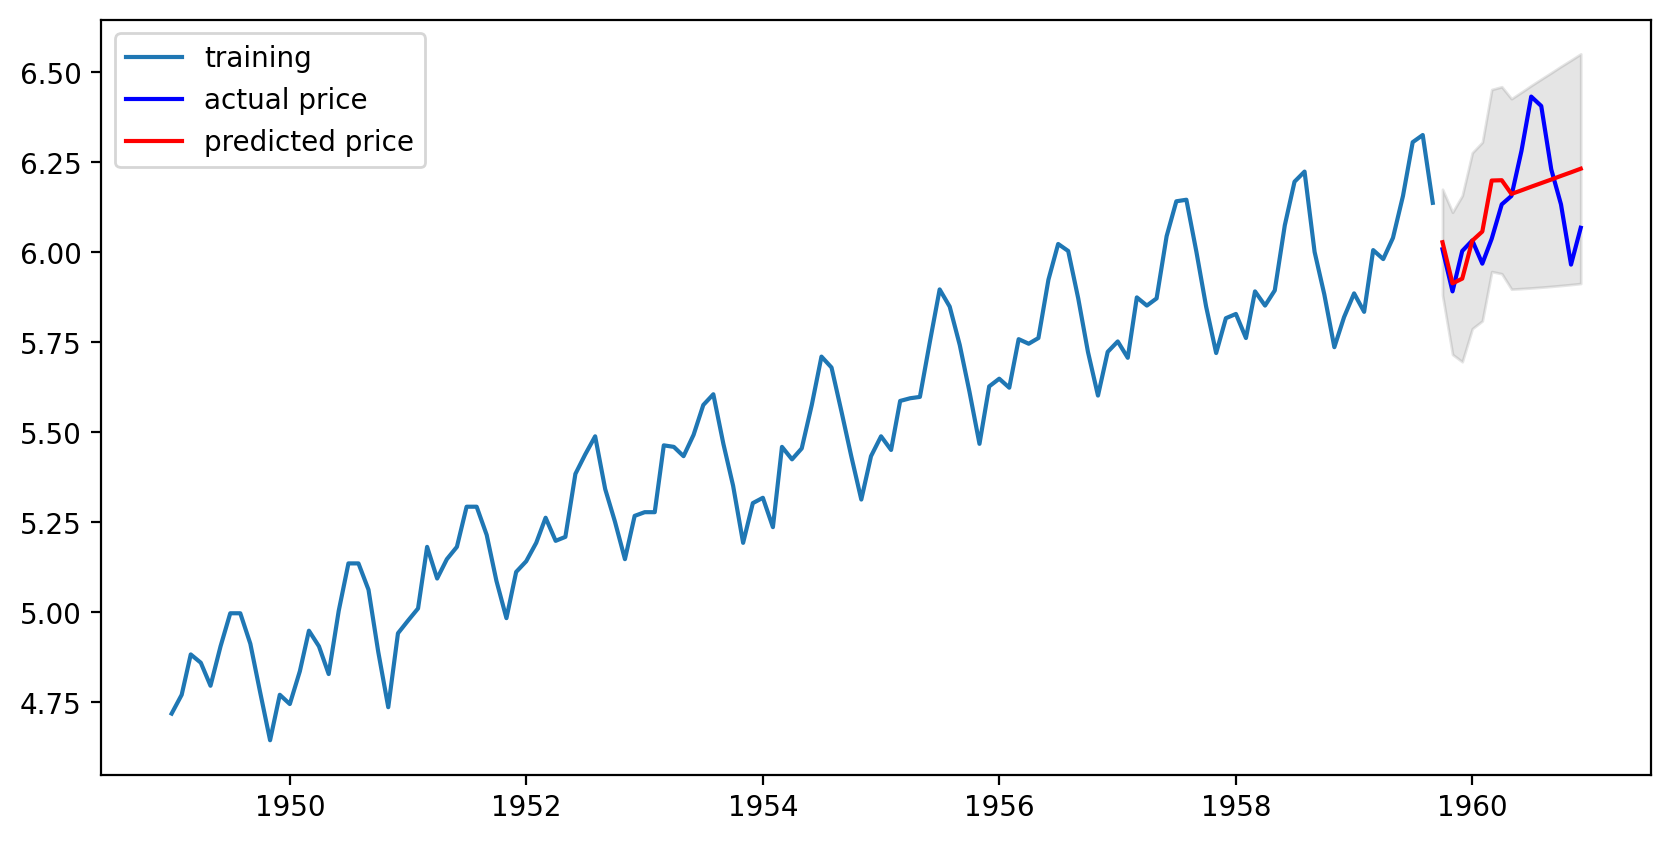

In [30]:
# 데이터 구간
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
#   step , 
# alpha 


# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

## 오차율 계산

In [31]:
#


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4342.695165507354
MAE:  49.63058276076067
RMSE:  65.89912871584384
MAPE: 10.40%
